In [ ]:
from IPython.display import display, HTML
import csv
import pandas as pd
import sqlite3
from sqlite3 import Error
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (6).csv


In [ ]:
con = sqlite3.connect("HeartDB.db") # change to 'sqlite:///your_filename.db'
cur = con.cursor()
cur.execute("drop table if exists heart")
cur.execute("""CREATE TABLE heart (Age real,
            Sex varchar(5),
            ChestPainType varchar(10),
            RestingBP real,
            Cholesterol real,
            FastingBS real,
            RestingECG varchar(20),
            MaxHR real,
            ExerciseAngina varchar(5),
            Oldpeak real,
            ST_Slope varchar(10),
            HeartDisease real);""") # use your column names here

with open('heart.csv','r') as fin: # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['Age'], i['Sex'],i['ChestPainType'], i['RestingBP'],i['Cholesterol'], i['FastingBS'],i['RestingECG'], i['MaxHR'],i['ExerciseAngina'], i['Oldpeak'],i['ST_Slope'],i['HeartDisease']) for i in dr]

cur.executemany("""INSERT INTO heart(Age, Sex, ChestPainType, RestingBP, Cholesterol,
                 FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease) 
                 VALUES (?, ?,?, ?,?, ?,?, ?,?, ?,?, ?);""", to_db)
con.commit()
# con.close()

In [ ]:
final = "select * from heart;"
heart = pd.read_sql_query(final , con)
# display(heart)

In [ ]:
con = sqlite3.connect("HeartDB.db") # change to 'sqlite:///your_filename.db'
cur = con.cursor()
cur.execute("drop table if exists Sex")
cur.execute("""CREATE TABLE Sex (
            SexID integer PRIMARY KEY,
            
            Sex TEXT
            );""") # use your column names here

sql_statement = 'SELECT DISTINCT Sex FROM Heart'
cur.execute(sql_statement)
Sex_fetched = cur.fetchall()
touple_to_list = []
# print(patient_info)
sex_list = [1,0]
for ele in Sex_fetched:
    for i in ele:
        touple_to_list.append(i)

sex_data = list(zip(sex_list,touple_to_list))
cur.executemany("""INSERT INTO Sex(SexID, Sex) 
                 VALUES (?,?);""", sex_data)
con.commit()

sql_statement = "select * from Sex;"
Sex = pd.read_sql_query(sql_statement, con)
display(Sex)

Sex_dic = {}
for i in range(2):
    Sex_dic[Sex.SexID[i]] = Sex.Sex[i]
print(Sex_dic)

,SexID,Sex
0,0,F
1,1,M


{0: 'F', 1: 'M'}


In [ ]:
#con = sqlite3.connect("HeartDB.db") # change to 'sqlite:///your_filename.db'
#cur = con.cursor()
cur.execute("drop table if exists ExerciseAngina")
cur.execute("""CREATE TABLE ExerciseAngina (
            exerciseanginaID integer PRIMARY KEY,
            exerciseangina TEXT
            );""") # use your column names here
sql_statement = 'SELECT DISTINCT ExerciseAngina FROM Heart order by exerciseangina;'
cur.execute(sql_statement)
exerciseangina_fetched = cur.fetchall()

# print(patient_info)

cur.executemany("""INSERT INTO ExerciseAngina(exerciseangina) 
                 VALUES (?);""", exerciseangina_fetched)

cur.execute("""UPDATE ExerciseAngina SET ExerciseAnginaID = 0 where ExerciseAnginaID = 1;""")
cur.execute("""UPDATE ExerciseAngina SET ExerciseAnginaID = 1 where ExerciseAnginaID = 2;""")
con.commit()

sql_statement = "select * from ExerciseAngina;"
ExerciseAngina = pd.read_sql_query(sql_statement, con)
display(ExerciseAngina)

ExerciseAngina_dic = {}
for i in range(2):
    ExerciseAngina_dic[ExerciseAngina.exerciseanginaID[i]] = ExerciseAngina.exerciseangina[i]
print(ExerciseAngina_dic)

,exerciseanginaID,exerciseangina
0,0,N
1,1,Y


{0: 'N', 1: 'Y'}


In [ ]:
#con = sqlite3.connect("HeartDB.db") # change to 'sqlite:///your_filename.db'
#cur = con.cursor()
cur.execute("drop table if exists ChestPainType")
cur.execute("""CREATE TABLE ChestPainType (
            ChestPainTypeID integer PRIMARY KEY,
            ChestPainType TEXT
            );""") # use your column names here

sql_statement = 'SELECT DISTINCT ChestPainType FROM Heart'
cur.execute(sql_statement)
chestpaintype_fetched = cur.fetchall()

# print(patient_info)

cur.executemany("""INSERT INTO ChestPainType(ChestPainType) 
                 VALUES (?);""", chestpaintype_fetched)

cur.execute("""UPDATE ChestPainType SET ChestPainTypeID = 0 where ChestPainTypeID = 3;""")
cur.execute("""UPDATE ChestPainType SET ChestPainTypeID = 3 where ChestPainTypeID = 4;""")

con.commit()

sql_statement = "select * from ChestPainType;"
ChestPainType = pd.read_sql_query(sql_statement, con)
display(ChestPainType)

ChestPainType_dic = {}
for i in range(4):
    ChestPainType_dic[ChestPainType.ChestPainTypeID[i]] = ChestPainType.ChestPainType[i]
print(ChestPainType_dic)

,ChestPainTypeID,ChestPainType
0,0,ASY
1,1,ATA
2,2,NAP
3,3,TA


{0: 'ASY', 1: 'ATA', 2: 'NAP', 3: 'TA'}


In [ ]:
#con = sqlite3.connect("HeartDB.db") # change to 'sqlite:///your_filename.db'
#cur = con.cursor()
cur.execute("drop table if exists RestingECG")
cur.execute("""CREATE TABLE RestingECG (
            RestingECGID integer PRIMARY KEY,
            RestingECG TEXT
            );""") # use your column names here

sql_statement = 'SELECT DISTINCT RestingECG FROM Heart'
cur.execute(sql_statement)
restingecg_fetched = cur.fetchall()

# print(patient_info)

cur.executemany("""INSERT INTO RestingECG(RestingECG) 
                 VALUES (?);""", restingecg_fetched)

cur.execute("""UPDATE RestingECG SET RestingECGID = 0 where RestingECGID = 3;""")

con.commit()

# ST_slope_dic = {}
# for i in range(3):
#   ST_slope_dic[ST_Slope.ST_SlopeID[i]] = ST_Slope.ST_Slope[i]

sql_statement = "select * from RestingECG;"
RestingECG = pd.read_sql_query(sql_statement, con)
display(RestingECG)

# RestingECG_dic = {}
# for i in range(3):
#   RestingECG_dic[RestingECG.RestingECGID[i]] = RestingECG.RestingECG[i]
# print(RestingECG_dic)

,RestingECGID,RestingECG
0,0,LVH
1,1,Normal
2,2,ST


In [ ]:
#con = sqlite3.connect("HeartDB.db") # change to 'sqlite:///your_filename.db'
#cur = con.cursor()
cur.execute("drop table if exists ST_Slope")
cur.execute("""CREATE TABLE ST_Slope (
            ST_SlopeID integer PRIMARY KEY,
            ST_Slope TEXT
            );""") # use your column names here

sql_statement = 'SELECT DISTINCT ST_Slope FROM Heart'
cur.execute(sql_statement)
st_slope_fetched = cur.fetchall()

# print(patient_info)

cur.executemany("""INSERT INTO ST_Slope(ST_Slope) 
                 VALUES (?);""", st_slope_fetched)


cur.execute("""UPDATE ST_Slope SET ST_SlopeID = 0 where ST_SlopeID = 3;""")
cur.execute("""UPDATE ST_Slope SET ST_SlopeID = 3 where ST_SlopeID = 1;""")
cur.execute("""UPDATE ST_Slope SET ST_SlopeID = 1 where ST_SlopeID = 2;""")
cur.execute("""UPDATE ST_Slope SET ST_SlopeID = 2 where ST_SlopeID = 3;""")


con.commit()

sql_statement = "select * from ST_Slope;"
ST_Slope = pd.read_sql_query(sql_statement, con)
display(ST_Slope)
ST_slope_dic = {}
for i in range(3):
    ST_slope_dic[ST_Slope.ST_SlopeID[i]] = ST_Slope.ST_Slope[i]

print(ST_slope_dic)
  

,ST_SlopeID,ST_Slope
0,0,Down
1,1,Flat
2,2,Up


{0: 'Down', 1: 'Flat', 2: 'Up'}


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Sex = heart['Sex'].tolist()
heart['Sex'] = le.fit_transform(Sex)

ChestPainType = heart['ChestPainType'].tolist() 
heart['ChestPainType'] = le.fit_transform(ChestPainType)

RestingECG = heart['RestingECG'].tolist() 
heart['RestingECG'] = le.fit_transform(RestingECG)

ExerciseAngina = heart['ExerciseAngina'].tolist() 
heart['ExerciseAngina'] = le.fit_transform(ExerciseAngina)

ST_Slope = heart['ST_Slope'].tolist() 
heart['ST_Slope'] = le.fit_transform(ST_Slope)

display(heart)



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1,1,140.0,289.0,0.0,1,172.0,0,0.0,2,0.0
1,49.0,0,2,160.0,180.0,0.0,1,156.0,0,1.0,1,1.0
2,37.0,1,1,130.0,283.0,0.0,2,98.0,0,0.0,2,0.0
3,48.0,0,0,138.0,214.0,0.0,1,108.0,1,1.5,1,1.0
4,54.0,1,2,150.0,195.0,0.0,1,122.0,0,0.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,1.0
914,68.0,1,0,144.0,193.0,1.0,1,141.0,0,3.4,1,1.0
915,57.0,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0
916,57.0,0,1,130.0,236.0,0.0,0,174.0,0,0.0,1,1.0


In [ ]:
sql = """select Age, Sex.Sex as Gender, chestPainType.ChestPainType as CPT,
          restingECG.restingECG as RECG,
          ST_slope.ST_slope as ST 
          FROM heart, Sex, ChestPainType, RestingECG, ST_slope
          Where heart.Sex=Sex.sexID and heart.ChestPainType = ChestPainType.ChestPainTypeID
                and heart.RestingECG = RestingECG.RestingECGID and heart.ST_slope = ST_slope.ST_slopeID;"""

con = sqlite3.connect("HeartDB.db") # change to 'sqlite:///your_filename.db'
display(pd.read_sql_query(sql, con))

,Age,Gender,CPT,RECG,ST


In [ ]:
# %pip install sqlalchemy
from sqlalchemy import create_engine
heart.to_sql("map_heart", con, schema="HeartDB.db",if_exists='replace')
# display(map_heart)

In [ ]:
heart = (pd.read_sql_query("Select * from map_heart", con))

In [ ]:
display(heart)

,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40.0,1,1,140.0,289.0,0.0,1,172.0,0,0.0,2,0.0
1,1,49.0,0,2,160.0,180.0,0.0,1,156.0,0,1.0,1,1.0
2,2,37.0,1,1,130.0,283.0,0.0,2,98.0,0,0.0,2,0.0
3,3,48.0,0,0,138.0,214.0,0.0,1,108.0,1,1.5,1,1.0
4,4,54.0,1,2,150.0,195.0,0.0,1,122.0,0,0.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,45.0,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,1.0
914,914,68.0,1,0,144.0,193.0,1.0,1,141.0,0,3.4,1,1.0
915,915,57.0,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0
916,916,57.0,0,1,130.0,236.0,0.0,0,174.0,0,0.0,1,1.0


In [ ]:
join_sql = """select 
              h.Age, 
              s.Sex, 
              c.ChestPainType, 
              h.RestingBP, 
              h.Cholesterol, 
              h.FastingBS, 
              r.RestingECG, 
              h.MaxHR, 
              e.ExerciseAngina, 
              h.Oldpeak, 
              ss.ST_Slope, 
              h.HeartDisease
              from map_heart h
              join
              Sex s
              on h.Sex=s.SexID
              join
              ExerciseAngina e
              on h.exerciseangina=e.exerciseanginaID
              join
              ChestPainType c
              on h.ChestPainType=c.ChestPainTypeID
              join
              RestingECG r
              on h.RestingECG=r.RestingECGID
              join
              ST_Slope ss
              on h.ST_Slope=ss.ST_SlopeID"""

heart_information = pd.read_sql_query(join_sql, con)

In [ ]:
display(pd.read_sql_query("Select * from Sex", con))
display(pd.read_sql_query("Select * from ExerciseAngina", con))
display(pd.read_sql_query("Select * from ChestPainType", con))
display(pd.read_sql_query("Select * from RestingECG", con))
display(pd.read_sql_query("Select * from ST_Slope", con))

,SexID,Sex
0,0,F
1,1,M


,exerciseanginaID,exerciseangina
0,0,N
1,1,Y


,ChestPainTypeID,ChestPainType
0,0,ASY
1,1,ATA
2,2,NAP
3,3,TA


,RestingECGID,RestingECG
0,0,LVH
1,1,Normal
2,2,ST


,ST_SlopeID,ST_Slope
0,0,Down
1,1,Flat
2,2,Up


In [ ]:
heart = heart_information
display(heart)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,exerciseangina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110.0,264.0,0.0,Normal,132.0,N,1.2,Flat,1.0
914,68.0,M,ASY,144.0,193.0,1.0,Normal,141.0,N,3.4,Flat,1.0
915,57.0,M,ASY,130.0,131.0,0.0,Normal,115.0,Y,1.2,Flat,1.0
916,57.0,F,ATA,130.0,236.0,0.0,LVH,174.0,N,0.0,Flat,1.0


In [ ]:
heart.info()
heart

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   exerciseangina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    float64
dtypes: float64(7), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,exerciseangina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110.0,264.0,0.0,Normal,132.0,N,1.2,Flat,1.0
914,68.0,M,ASY,144.0,193.0,1.0,Normal,141.0,N,3.4,Flat,1.0
915,57.0,M,ASY,130.0,131.0,0.0,Normal,115.0,Y,1.2,Flat,1.0
916,57.0,F,ATA,130.0,236.0,0.0,LVH,174.0,N,0.0,Flat,1.0


In [ ]:
heart.dtypes

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
exerciseangina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object

In [ ]:
num_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
cat_columns = ["Sex", "ChestPainType", "RestingECG", "ST_Slope", "FastingBS", "exerciseangina"]

In [ ]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
exerciseangina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
heart = heart[heart['Cholesterol'] > 0]

                   Age  RestingBP  ...   Oldpeak  HeartDisease
Age           1.000000   0.284774  ...  0.334900      0.307044
RestingBP     0.284774   1.000000  ...  0.200337      0.177632
Cholesterol   0.083445   0.092371  ...  0.086065      0.114898
FastingBS     0.240171   0.174927  ...  0.095044      0.160594
MaxHR        -0.363049  -0.131590  ... -0.303483     -0.385004
Oldpeak       0.334900   0.200337  ...  1.000000      0.504321
HeartDisease  0.307044   0.177632  ...  0.504321      1.000000

[7 rows x 7 columns]


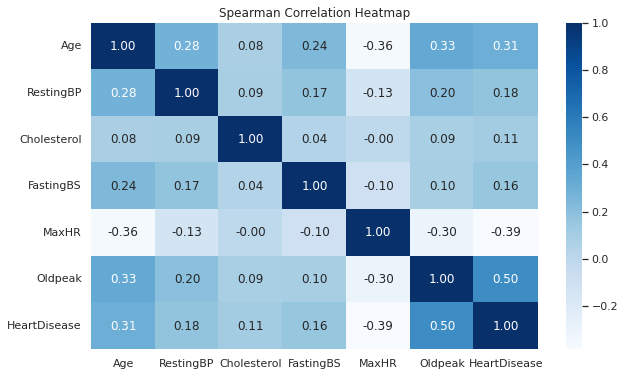

In [ ]:
corr = heart.corr(method = 'spearman')
print(corr)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues') #####
plt.title('Spearman Correlation Heatmap')
plt.show()

In [ ]:
sns.set(rc = {'figure.figsize':(10,6)})

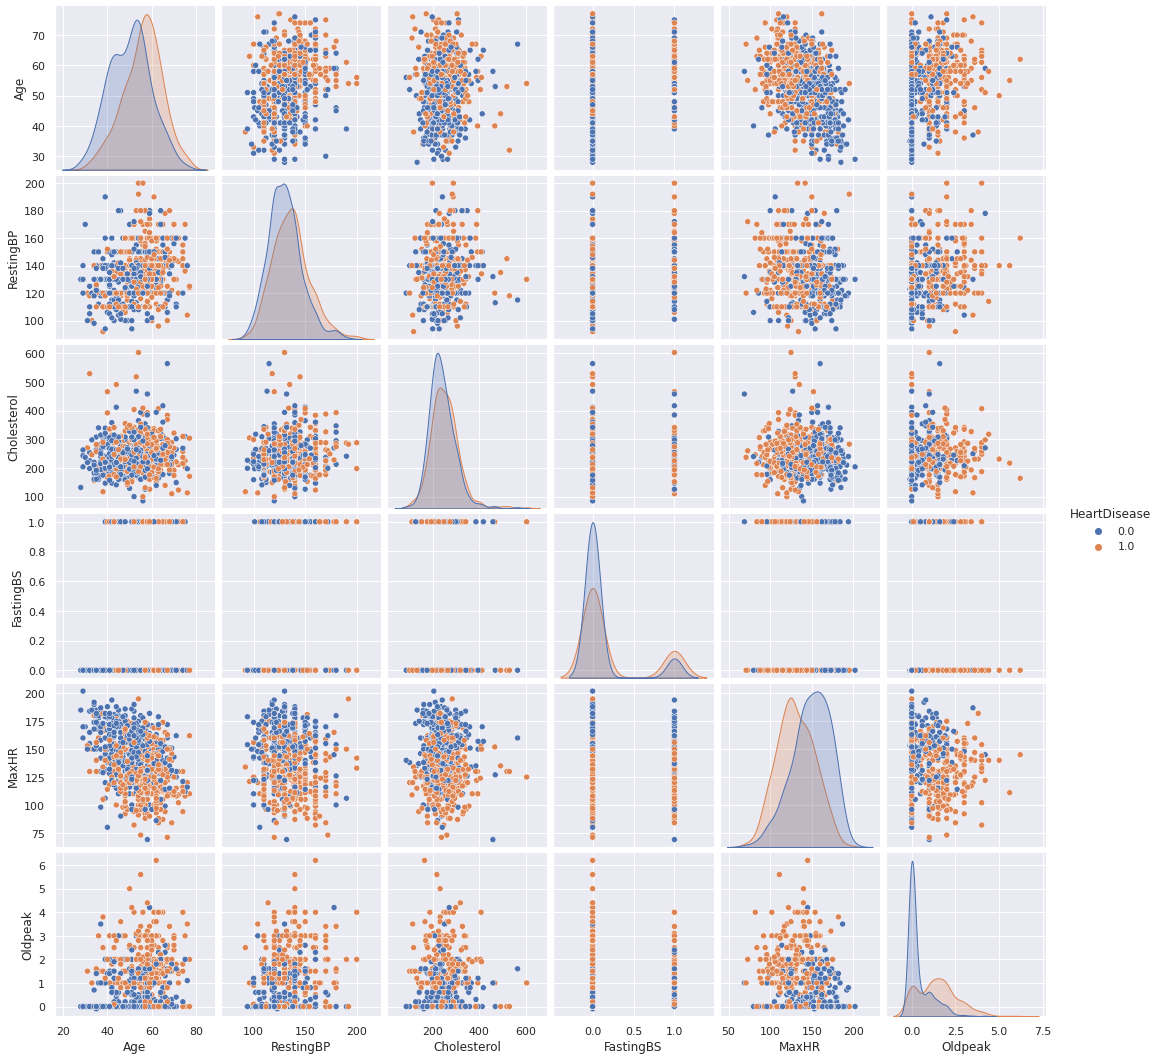

In [ ]:
sns.pairplot(heart, hue='HeartDisease')

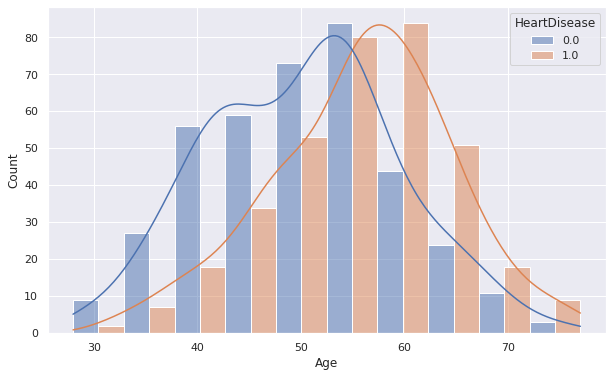

In [ ]:
sns.histplot(x = "Age", data=heart, kde=True, bins=10, hue='HeartDisease', multiple='dodge')

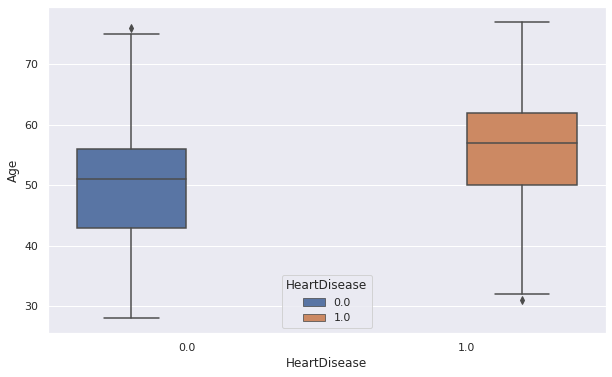

In [ ]:
sns.boxplot(x='HeartDisease', y="Age", data=heart, hue='HeartDisease')

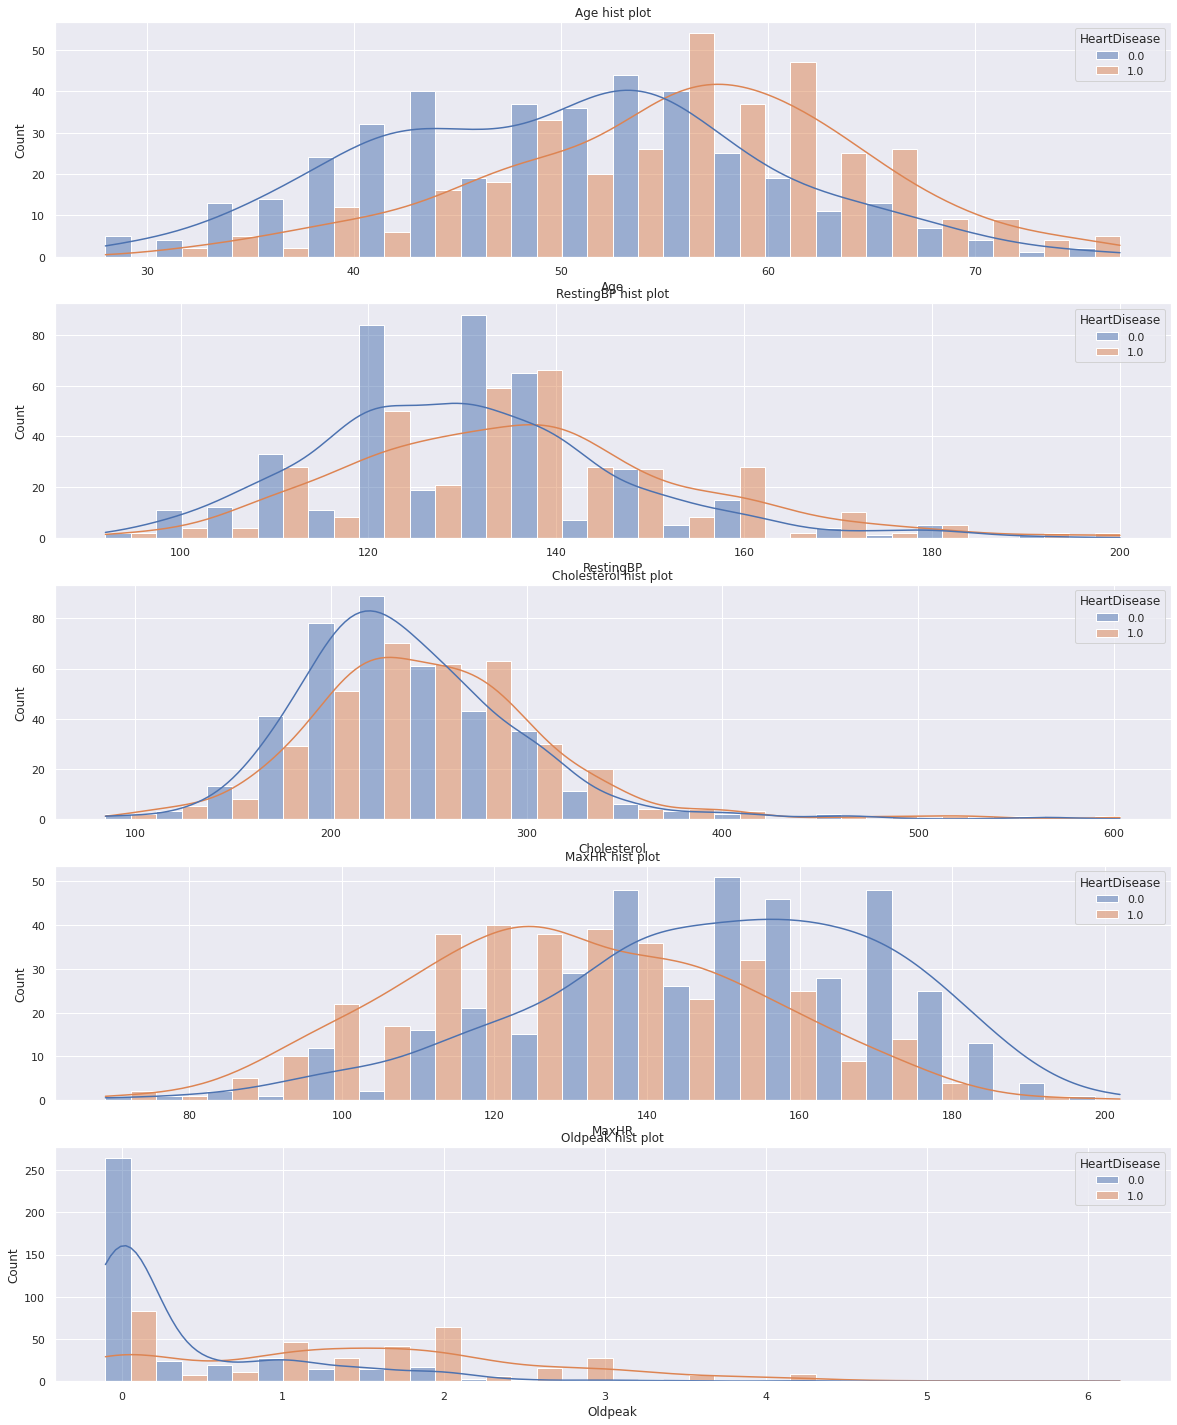

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(20,25))
for i, col in zip(range(0,5), num_columns):
    sns.histplot(ax = axes[i], x = col, data=heart, kde=True, bins=20, hue='HeartDisease', multiple='dodge')
    axes[i].set_title(f"{col} hist plot")

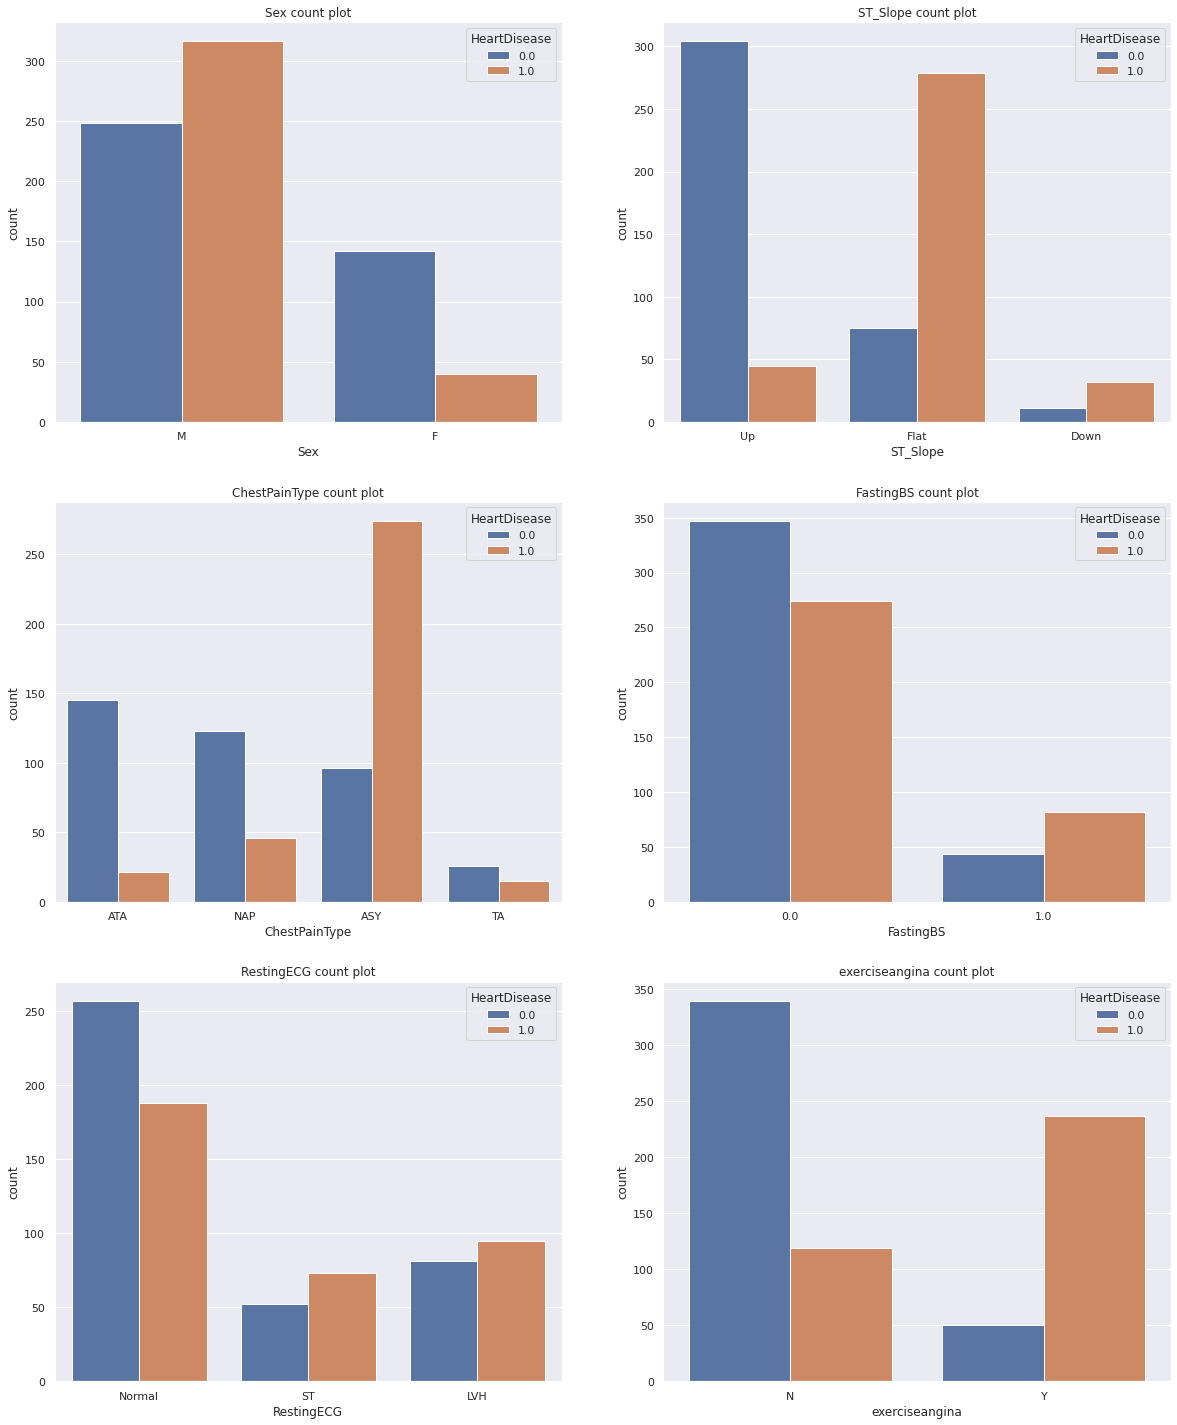

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20,25))
j, k = 0, 0
for i, col in zip(range(0,6), cat_columns):
    if i > 2:
        k = 1
        j = i-3
    sns.countplot(ax = axes[j][k], x = col, data=heart, hue='HeartDisease', alpha = 1)
    axes[j][k].set_title(f"{col} count plot")
    j+=1

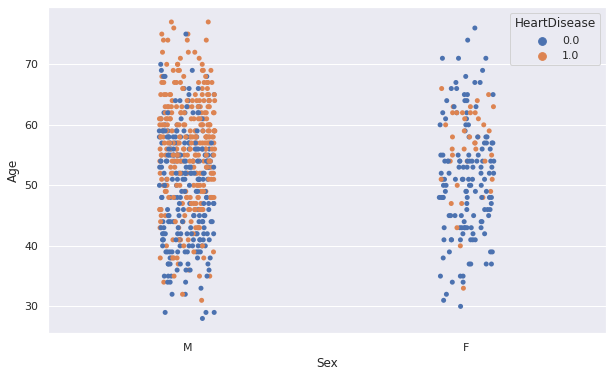

In [ ]:
sns.stripplot(data=heart, x="Sex", y="Age", hue="HeartDisease", jitter=True)

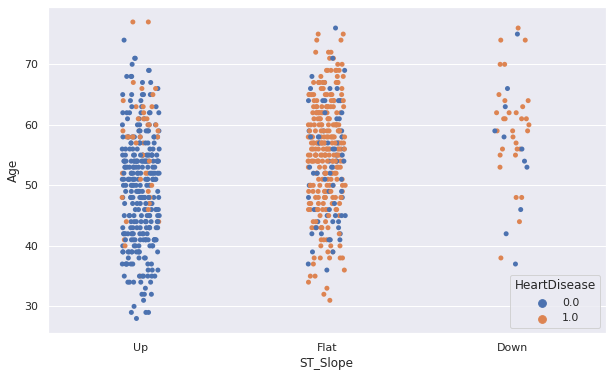

In [ ]:
sns.stripplot(data=heart, x="ST_Slope", y="Age", hue="HeartDisease", jitter=True)

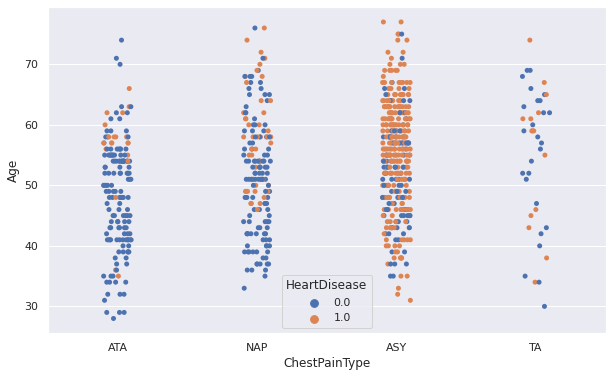

In [ ]:
sns.stripplot(data=heart, x="ChestPainType", y="Age", hue="HeartDisease", jitter=True)

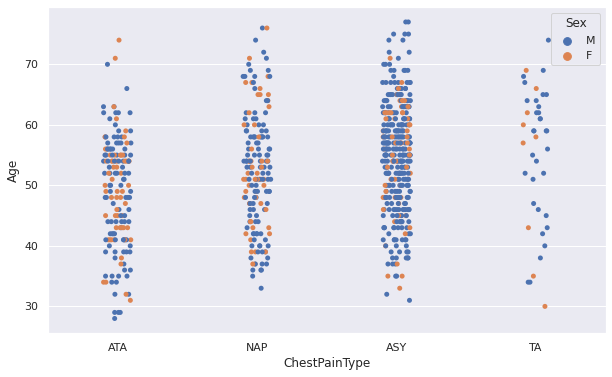

In [ ]:
sns.stripplot(data=heart, x="ChestPainType", y="Age", hue="Sex", jitter=True)

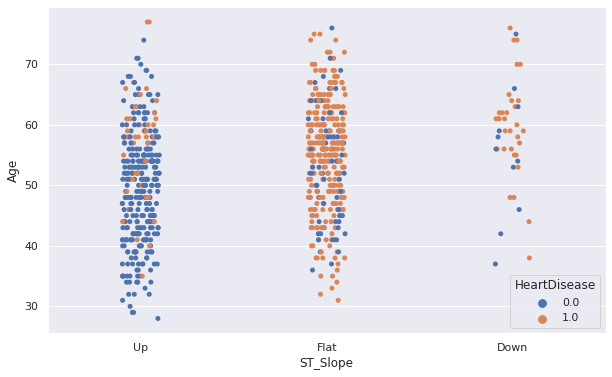

In [ ]:
sns.stripplot(data=heart, x="ST_Slope", y="Age", hue="HeartDisease", jitter=True)

In [ ]:
############################### Data Pre-processing #################################

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,exerciseangina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110.0,264.0,0.0,Normal,132.0,N,1.2,Flat,1.0
914,68.0,M,ASY,144.0,193.0,1.0,Normal,141.0,N,3.4,Flat,1.0
915,57.0,M,ASY,130.0,131.0,0.0,Normal,115.0,Y,1.2,Flat,1.0
916,57.0,F,ATA,130.0,236.0,0.0,LVH,174.0,N,0.0,Flat,1.0


In [ ]:
new_heart_data = heart["exerciseangina"].replace("N",0)
new_heart_data = heart["exerciseangina"].replace("Y",1)

new_heart_data = heart.replace("M",0)
new_heart_data = heart.replace("F",1,)


heart_data_with_dummies = pd.get_dummies(new_heart_data, drop_first=True)

y_1 = heart_data_with_dummies["HeartDisease"]
x_1 = heart_data_with_dummies.drop("HeartDisease", axis = 1)

In [ ]:
x_1

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,exerciseangina_Y,ST_Slope_Flat,ST_Slope_Up
0,40.0,140.0,289.0,0.0,172.0,0.0,1,1,0,0,1,0,0,0,1
1,49.0,160.0,180.0,0.0,156.0,1.0,0,0,1,0,1,0,0,1,0
2,37.0,130.0,283.0,0.0,98.0,0.0,1,1,0,0,0,1,0,0,1
3,48.0,138.0,214.0,0.0,108.0,1.5,0,0,0,0,1,0,1,1,0
4,54.0,150.0,195.0,0.0,122.0,0.0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,110.0,264.0,0.0,132.0,1.2,1,0,0,1,1,0,0,1,0
914,68.0,144.0,193.0,1.0,141.0,3.4,1,0,0,0,1,0,0,1,0
915,57.0,130.0,131.0,0.0,115.0,1.2,1,0,0,0,1,0,1,1,0
916,57.0,130.0,236.0,0.0,174.0,0.0,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x_1)
scaled_inputs = scaler.transform(x_1)
scaled_inputs

array([[-1.35607325,  0.40398044,  0.7504942 , ..., -0.79074163,
        -0.95029534,  1.06655324],
       [-0.40865641,  1.5619801 , -1.09340492, ..., -0.79074163,
         1.05230444, -0.9375997 ],
       [-1.67187886, -0.17501939,  0.64899516, ..., -0.79074163,
        -0.95029534,  1.06655324],
       ...,
       [ 0.43349189, -0.17501939, -1.92231369, ...,  1.26463557,
         1.05230444, -0.9375997 ],
       [ 0.43349189, -0.17501939, -0.1460806 , ..., -0.79074163,
         1.05230444, -0.9375997 ],
       [-1.56661032,  0.28818048, -1.17798745, ..., -0.79074163,
        -0.95029534,  1.06655324]])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
# split data
x_train, x_test, y_train, y_test, = train_test_split(scaled_inputs, y_1, random_state=42)

In [ ]:
#######################################Logistic Regression###############################################
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
clf = lg_model.fit(x_train, y_train)

In [ ]:
x_test_prob = clf.predict_proba(x_test)

In [ ]:
clf.score(x_test, y_test)

0.8716577540106952

In [ ]:
# splitting data
x_train, x_test, y_train, y_test, = train_test_split(x_1, y_1, random_state=42)

In [ ]:
from sklearn import tree
from sklearn import metrics
tree_model = tree.DecisionTreeClassifier(max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8235294117647058


[Text(279.0, 293.54400000000004, 'X[14] <= 0.5\ngini = 0.499\nsamples = 559\nvalue = [293, 266]'),
 Text(139.5, 228.312, 'X[4] <= 141.5\ngini = 0.347\nsamples = 296\nvalue = [66, 230]'),
 Text(69.75, 163.08000000000004, 'X[6] <= 0.5\ngini = 0.198\nsamples = 198\nvalue = [22, 176]'),
 Text(34.875, 97.84800000000001, 'gini = 0.48\nsamples = 25\nvalue = [10, 15]'),
 Text(104.625, 97.84800000000001, 'gini = 0.129\nsamples = 173\nvalue = [12, 161]'),
 Text(209.25, 163.08000000000004, 'X[12] <= 0.5\ngini = 0.495\nsamples = 98\nvalue = [44, 54]'),
 Text(174.375, 97.84800000000001, 'X[5] <= 2.45\ngini = 0.49\nsamples = 63\nvalue = [36, 27]'),
 Text(139.5, 32.61600000000004, 'gini = 0.46\nsamples = 53\nvalue = [34, 19]'),
 Text(209.25, 32.61600000000004, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(244.125, 97.84800000000001, 'gini = 0.353\nsamples = 35\nvalue = [8, 27]'),
 Text(418.5, 228.312, 'X[12] <= 0.5\ngini = 0.236\nsamples = 263\nvalue = [227, 36]'),
 Text(348.75, 163.08000000000

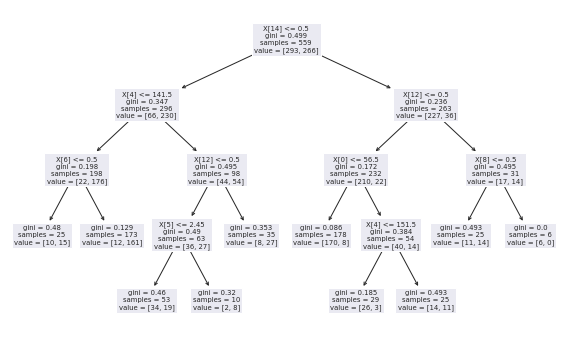

In [ ]:
tree.plot_tree(tree_model)

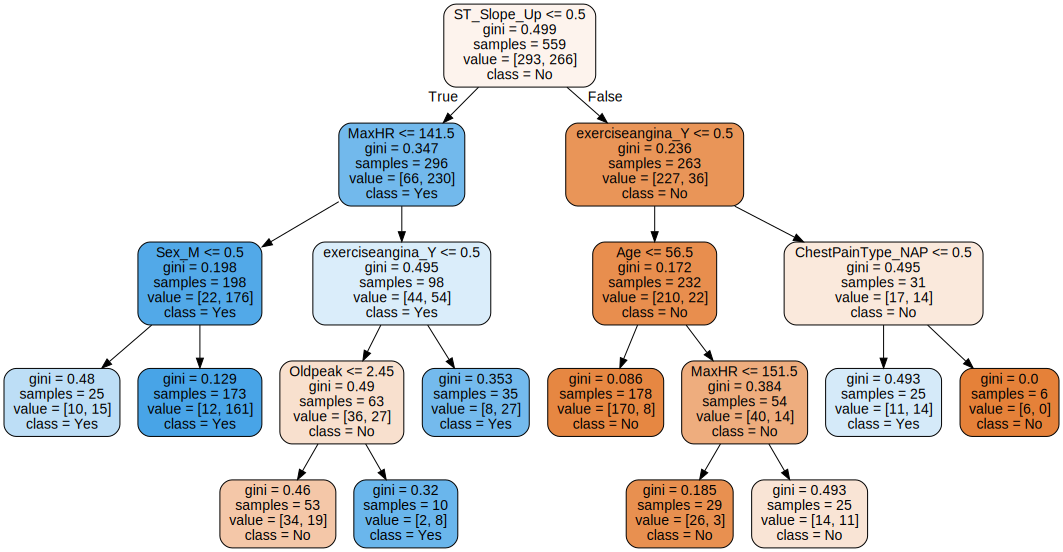

In [ ]:
import graphviz
dot_data = tree.export_graphviz(tree_model, out_file=None,
                      feature_names=x_train.columns,  
                      class_names=['No','Yes'],  
                      filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
# graph.render("HeartPred") 
graph 

In [ ]:
################################## KNN ######################################

In [ ]:
# splitting data
x_train, x_test, y_train, y_test, = train_test_split(scaled_inputs, y_1, random_state=42)

In [ ]:
k_range = list(range(1,22,1))

score_list = []
score_dict = {}
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_dict[k] = metrics.accuracy_score(y_test, y_pred)
    score_list.append(metrics.accuracy_score(y_test, y_pred))
  
  
print(score_list)

[0.8181818181818182, 0.8181818181818182, 0.8502673796791443, 0.839572192513369, 0.8716577540106952, 0.8609625668449198, 0.8770053475935828, 0.8770053475935828, 0.8877005347593583, 0.8770053475935828, 0.8877005347593583, 0.8663101604278075, 0.8877005347593583, 0.8823529411764706, 0.8877005347593583, 0.8770053475935828, 0.893048128342246, 0.893048128342246, 0.8983957219251337, 0.893048128342246, 0.893048128342246]


In [ ]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Test data accuracy')

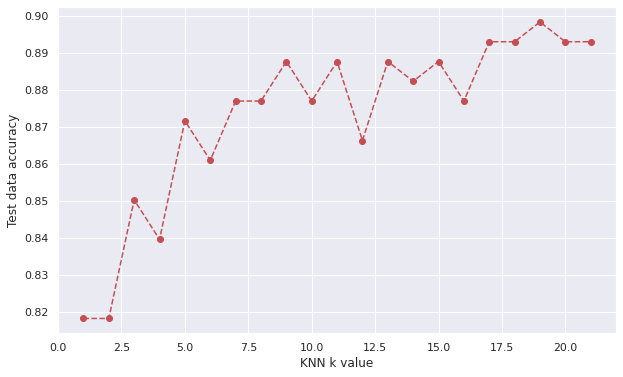

In [ ]:
plt.plot(k_range, score_list,'--ro', label='Accuracy')
plt.xlabel("KNN k value")
plt.ylabel("Test data accuracy")

In [ ]:
#Support Vector Machine

In [ ]:
#Split data to training and testing set
x_train, x_test, y_train, y_test, = train_test_split(scaled_inputs, y_1, random_state=42)

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

#Create a svm Classifier
svm_linear_model = svm.SVC(C = 1, kernel='linear') # Linear Kernel

svm_linear_model.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = svm_linear_model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8823529411764706
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        97
         1.0       0.88      0.88      0.88        90

    accuracy                           0.88       187
   macro avg       0.88      0.88      0.88       187
weighted avg       0.88      0.88      0.88       187



In [ ]:
import plotly.express as px
my_plot = px.scatter_3d(heart,
                         x='MaxHR',
                         y='Age',
                         z='HeartDisease',
                         color='ST_Slope')
my_plot.show()